In [15]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import math
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from matplotlib.lines import Line2D



# Construct the relative path to the CSV file
file_path = os.path.join('..', '..', 'Output', 'Simulation', 'sim_comparison.csv')

# Load the CSV file
df = pd.read_csv(file_path)
# Renaming columns
df.rename(columns={'Unnamed: 0' : 'WMU', 'Mean_estimated_Density':'Mean estimated Density', 'True_Density':'True Density','Mean_relative_Estimate': 'Relative mean estimate', 'Percent_Bias': 'Bias (%)', 'RRMSE': 'Relative RMSE', 'CI_Coverage_Prob': 'Probortion 95% CI', 'Mean_SE': 'Mean se', 'CV': 'Coefficient of variation', 'Mean_ER': 'Mean encounter rate', 'Mean_se_ER': 'Mean standard error ER'}, inplace=True)

# Remove the iteration number and keep only the first 6 characters
df['WMU'] = df['WMU'].str.slice(0, 6)

# Dictionary to map old simulation names to new ones
simulation_rename_dict = {
    'FW-Sys_2C': 'Fixed Wing Systematic 2 Cameras',
    'FW-ZZ_2C': 'Fixed Wing Zigzag 2 Cameras',
    'FW-Sys_G': 'Fixed Wing Systematic Gimbal',
    'FW-ZZ_G': 'Fixed Wing Zigzag Gimbal',
    'QC-Sys_NADIR': 'Quadcopter NADIR',
    'QC-Sys': 'Quadcopter Gimbal',
    'H-SG': 'Helicopter'
}
# Renaming the simulations
df['Simulation'] = df['Simulation'].replace(simulation_rename_dict)



In [2]:
# Display the first few rows of the dataframe
print(df)
print(df.columns)

       WMU    Simulation  Mean estimated Density  True Density  \
0   WMU501     FW-Sys 2C                   0.249         0.252   
1   WMU501      FW-ZZ 2C                   0.248         0.252   
2   WMU501      FW-Sys G                   0.248         0.252   
3   WMU501       FW-ZZ G                   0.247         0.252   
4   WMU501  QC-Sys NADIR                   0.270         0.247   
5   WMU501        QC-Sys                   0.240         0.247   
6   WMU501          H-SG                   0.210         0.238   
7   WMU503     FW-Sys 2C                   0.490         0.501   
8   WMU503      FW-ZZ 2C                   0.490         0.501   
9   WMU503      FW-Sys G                   0.488         0.501   
10  WMU503       FW-ZZ G                   0.487         0.501   
11  WMU503  QC-Sys NADIR                   0.495         0.477   
12  WMU503        QC-Sys                   0.465         0.477   
13  WMU503          H-SG                   0.397         0.455   
14  WMU512

C:\Users\lhambrec\AppData\Local\Temp\ipykernel_33424\3887831233.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Simulation', y=column, data=df, ax=axes[i], palette=palette)
C:\Users\lhambrec\AppData\Local\Temp\ipykernel_33424\3887831233.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Simulation', y=column, data=df, ax=axes[i], palette=palette)
C:\Users\lhambrec\AppData\Local\Temp\ipykernel_33424\3887831233.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Simulation', y=column, data=df, ax=axes[i], palette=palette)
C:\U

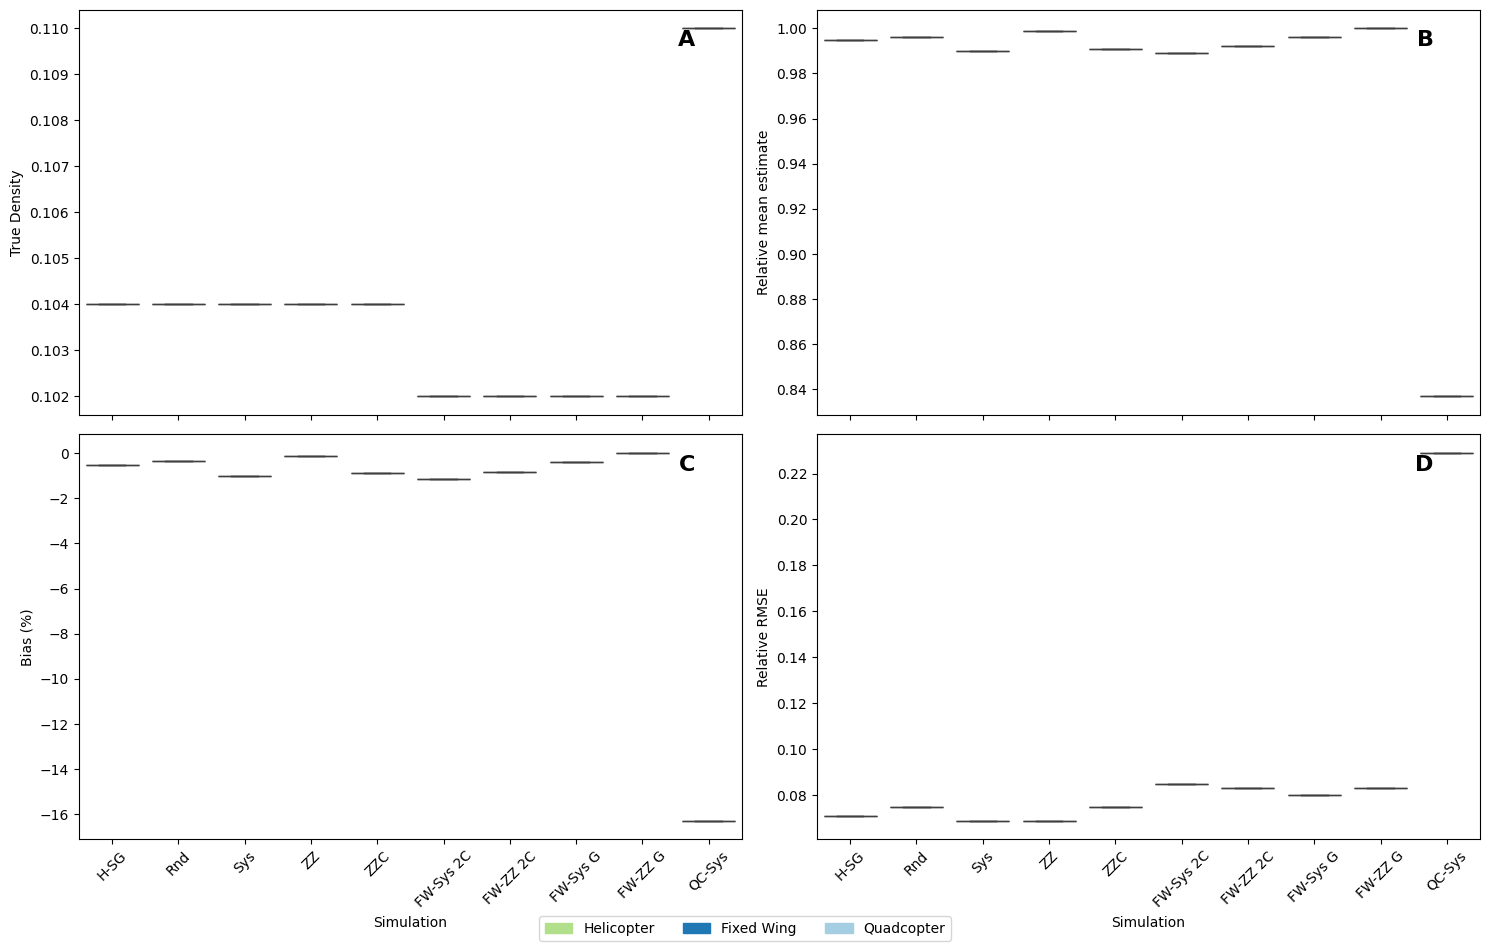

In [18]:
# List of column indices to plot (0-based index)
columns_to_plot = [3, 4, 5, 6]  # Example: columns 4-6

# Number of columns to plot
num_columns = len(columns_to_plot)

# Calculate the number of rows and columns for the subplots
ncols = 2
nrows = math.ceil(num_columns / ncols)

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define a function to assign colors based on 'Simulation' values
def get_color(simulation):
    if simulation.startswith('FW'):
        return '#1f78b4'
    elif simulation.startswith('QC'):
        return '#a6cee3'
    else:
        return '#b2df8a'

# Letters to annotate subplots
letters = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

# Loop through each specified column in the DataFrame
for i, col_index in enumerate(columns_to_plot):
    column = df.columns[col_index]
    
    # Create a color palette based on the 'Simulation' column
    palette = {sim: get_color(sim) for sim in df['Simulation'].unique()}
    
    sns.boxplot(x='Simulation', y=column, data=df, ax=axes[i], palette=palette)

    # Add letter annotation in the top right corner
    axes[i].text(0.93, 0.95, letters[i], transform=axes[i].transAxes, 
                 fontsize=16, fontweight='bold', va='top', ha='right')
    
    # Add title and labels
    # axes[i].set_title(f'Boxplot of {column} by Simulation')
    axes[i].set_ylabel(column)
    
    # Rotate x-axis labels
    axes[i].tick_params(axis='x', rotation=45)
    
    # Hide x-axis labels for all but the last row of subplots
    if i < (nrows - 1) * ncols:
        axes[i].set_xlabel('')
        axes[i].set_xticklabels([])

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Create custom legend handles
legend_handles = [
    Patch(color='#b2df8a', label='Helicopter'),
    Patch(color='#1f78b4', label='Fixed Wing'),
    Patch(color='#a6cee3', label='Quadcopter')    
]

# Add the legend to the figure
fig.legend(handles=legend_handles, loc='lower center', ncol=3)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust rect to make space for the legend

# Show the plot
plt.show()

C:\Users\lhambrec\AppData\Local\Temp\ipykernel_28016\3391697017.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Simulation', y=column, data=df, ax=axes[i], palette=palette)
C:\Users\lhambrec\AppData\Local\Temp\ipykernel_28016\3391697017.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(labels)
C:\Users\lhambrec\AppData\Local\Temp\ipykernel_28016\3391697017.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Simulation', y=column, data=df, ax=axes[i], palette=palette)
C:\Users\lhambrec\AppData\Local\Temp\ipykernel_28016\3391697017.py:51: UserWarning: set_ticklabels() sh

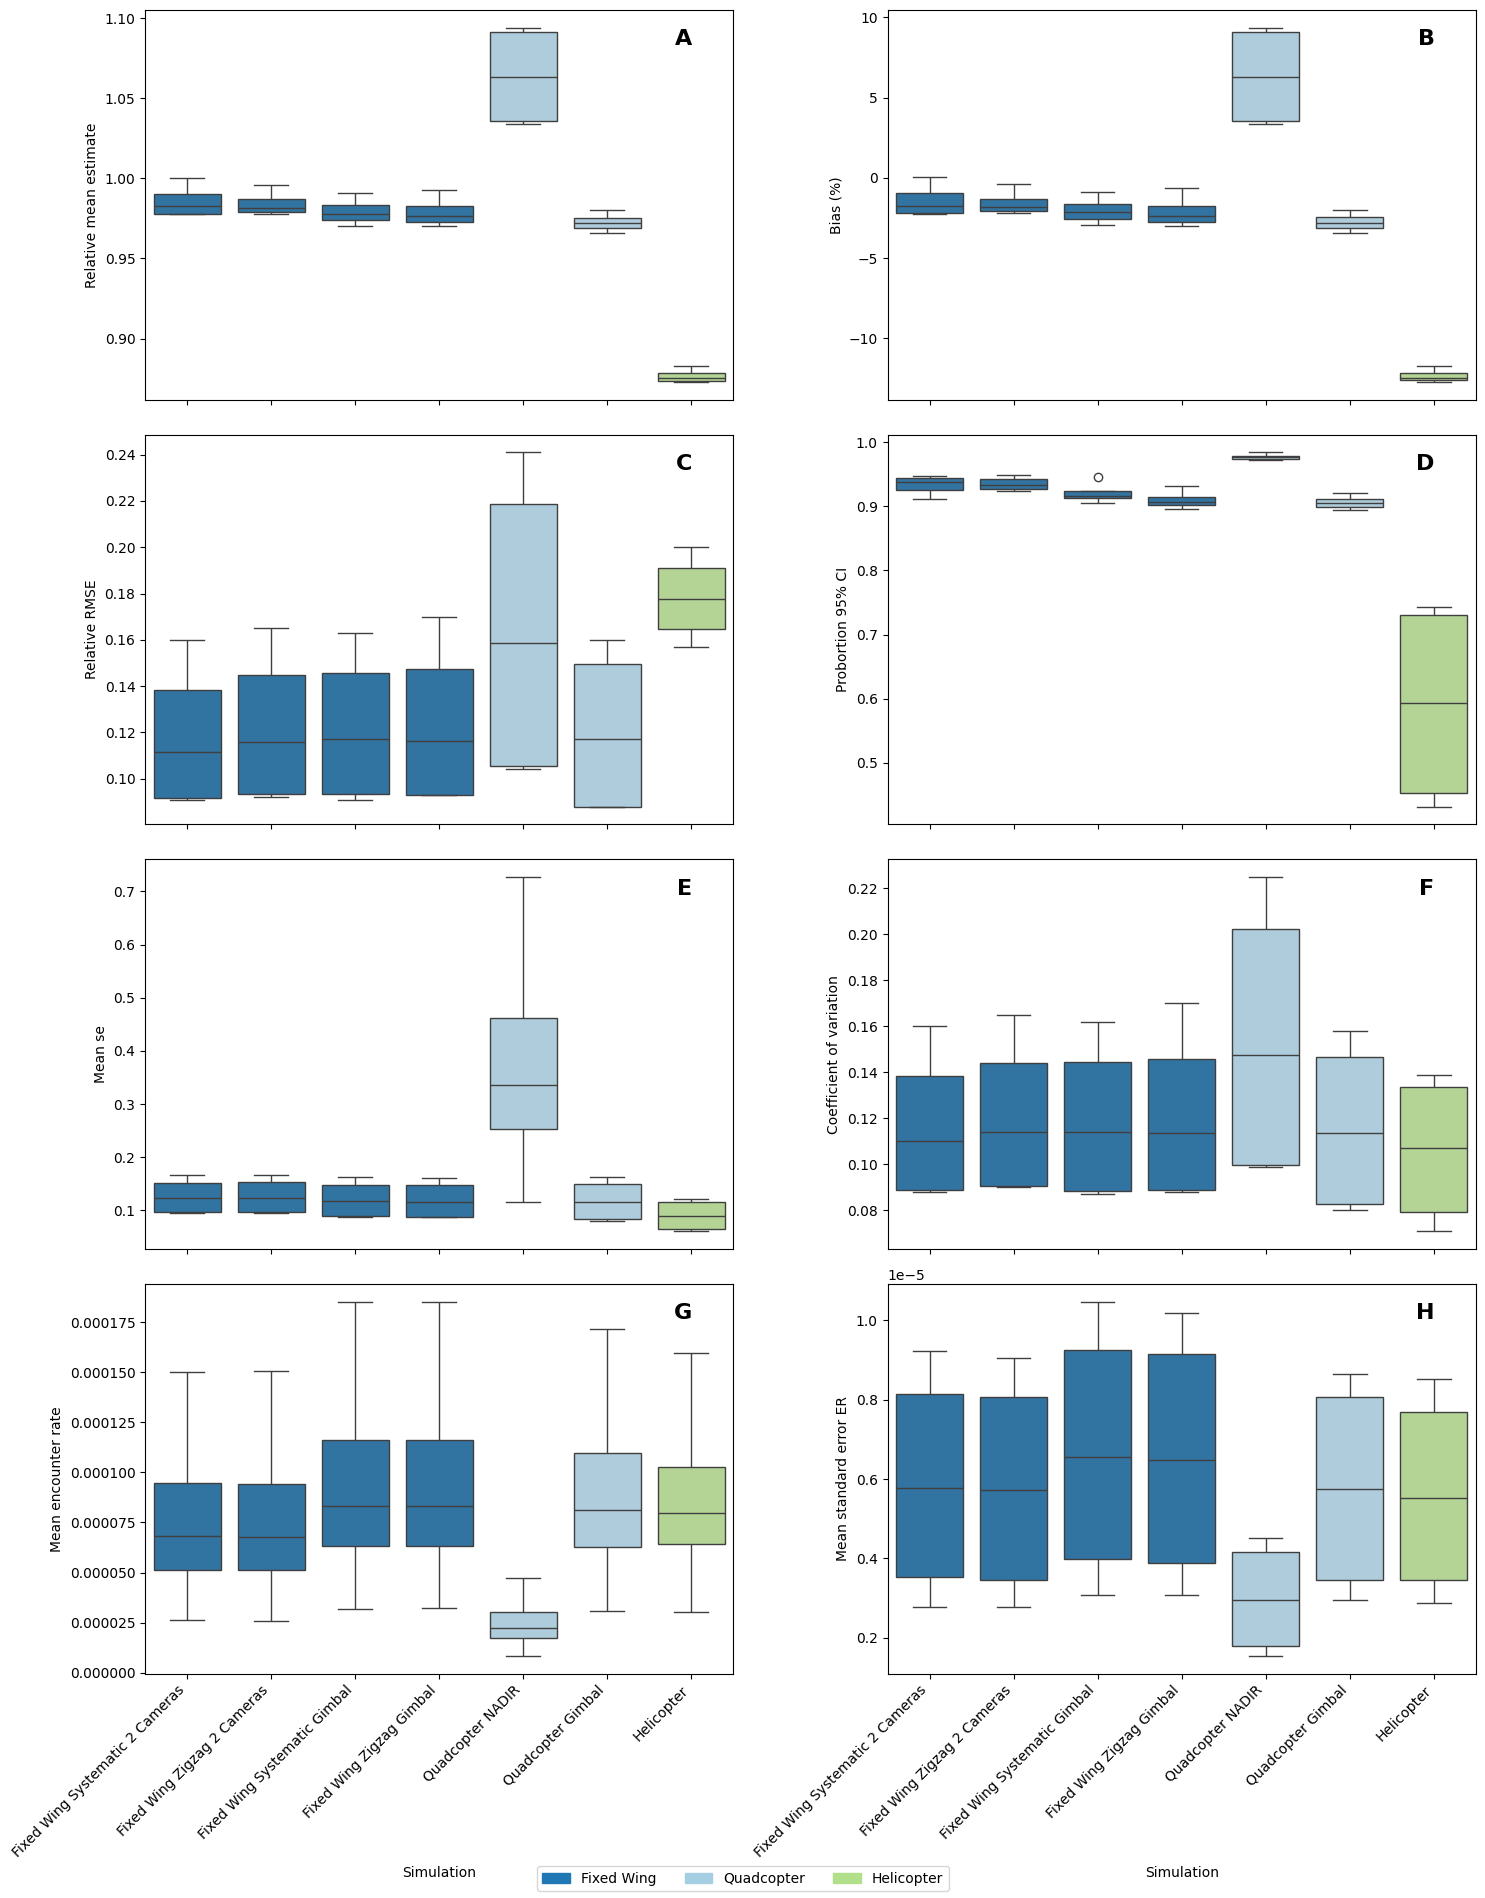

In [34]:

# List of column indices to plot (0-based index)
columns_to_plot = [4,5,6,7,8,9,10,11]  # Example: columns 4-6# List of column indices to plot (0-based index)

# Number of columns to plot
num_columns = len(columns_to_plot)

# Calculate the number of rows and columns for the subplots
ncols = 2
nrows = math.ceil(num_columns / ncols)

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define a function to assign colors based on 'Simulation' values
def get_color(simulation):
    if simulation.startswith('Fixed'):
        return '#1f78b4'
    elif simulation.startswith('Quadcopter'):
        return '#a6cee3'
    else:
        return '#b2df8a'

# Letters to annotate subplots
letters = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

# Loop through each specified column in the DataFrame
for i, col_index in enumerate(columns_to_plot):
    column = df.columns[col_index]
    
    # Create a color palette based on the 'Simulation' column
    palette = {sim: get_color(sim) for sim in df['Simulation'].unique()}
    
    sns.boxplot(x='Simulation', y=column, data=df, ax=axes[i], palette=palette)

    # Add letter annotation in the top right corner
    axes[i].text(0.93, 0.95, letters[i], transform=axes[i].transAxes, 
                 fontsize=16, fontweight='bold', va='top', ha='right')
    
    # Add title and labels
    # axes[i].set_title(f'Boxplot of {column} by Simulation')
    axes[i].set_ylabel(column)
    
    # Rotate x-axis labels
    axes[i].tick_params(axis='x', rotation=45)
    labels = axes[i].get_xticklabels()
    for label in labels:
        label.set_ha('right')  # Move labels to the left
    axes[i].set_xticklabels(labels)
    
    # Hide x-axis labels for all but the last row of subplots
    if i < (nrows - 1) * ncols:
        axes[i].set_xlabel('')
        axes[i].set_xticklabels([])

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Create custom legend handles
legend_handles = [
    Patch(color='#1f78b4', label='Fixed Wing'),
    Patch(color='#a6cee3', label='Quadcopter'),
    Patch(color='#b2df8a', label='Helicopter')    
]

# Add the legend to the figure
fig.legend(handles=legend_handles, loc='lower center', ncol=3)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust rect to make space for the legend

# Show the plot
plt.show()

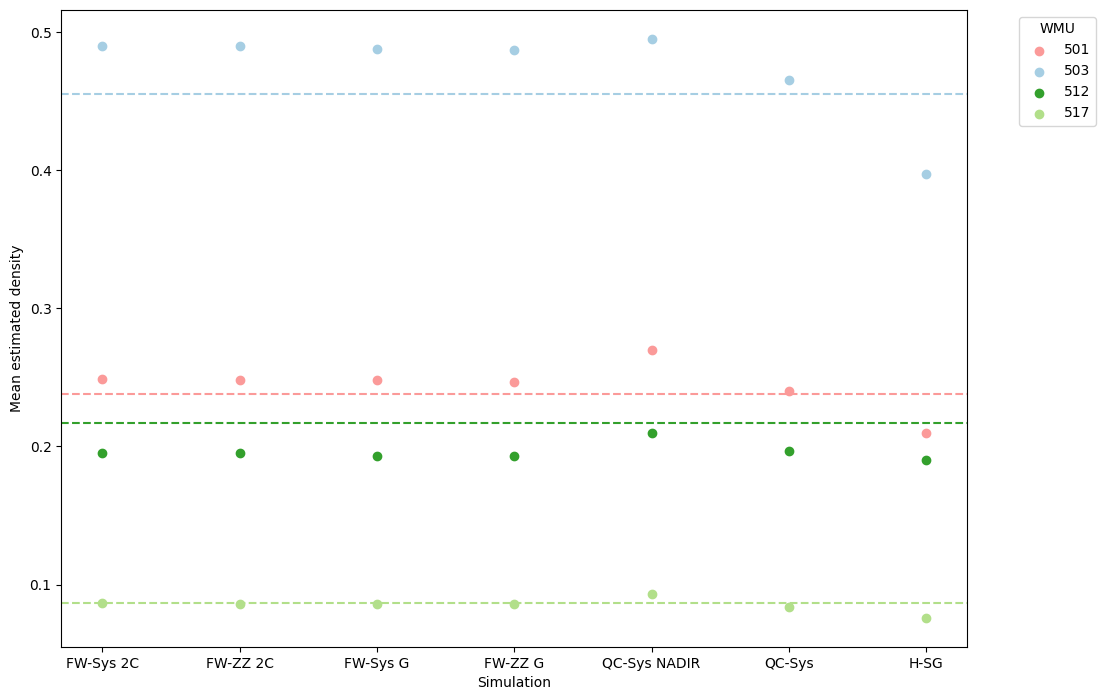

In [12]:
# Predefined colors for each WMU
wmu_colors = {
    'WMU501': '#fb9a99',   # Pink
    'WMU503': '#a6cee3',  # light Blue
    'WMU512': '#33a02c',  # Green
    'WMU517': '#b2df8a',  # light Green
    'WMU528': '#1f78b4'  # Blue
}

# Custom legend labels
wmu_labels = {
    'WMU501': '501',
    'WMU503': '503',
    'WMU512': '512',
    'WMU517': '517',
    'WMU528': '528'
}

# Plotting
fig, ax = plt.subplots(figsize=(11.69, 8.27))  # A4 size in landscape orientation

# Group by WMU and plot each group
for key, grp in df.groupby('WMU'):
    color = wmu_colors.get(key, '#000000')  # Default to black if WMU not found
    label = wmu_labels.get(key, key)  # Use custom label if available, otherwise use key
    ax.scatter(grp['Simulation'], grp['Mean estimated Density'], label=label, color=color)
    true_density = grp['True Density'].iloc[6]  # Assuming True Density is the same for each group
    ax.axhline(y=true_density, linestyle='--', color=color, label='_nolegend_')

# Adding labels and title
ax.set_xlabel('Simulation')
ax.set_ylabel('Mean estimated density')
# ax.set_title('Scatter Plot of Simulation vs Mean estimated Density')
# Place legend outside the plot
ax.legend(title='WMU', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.show()

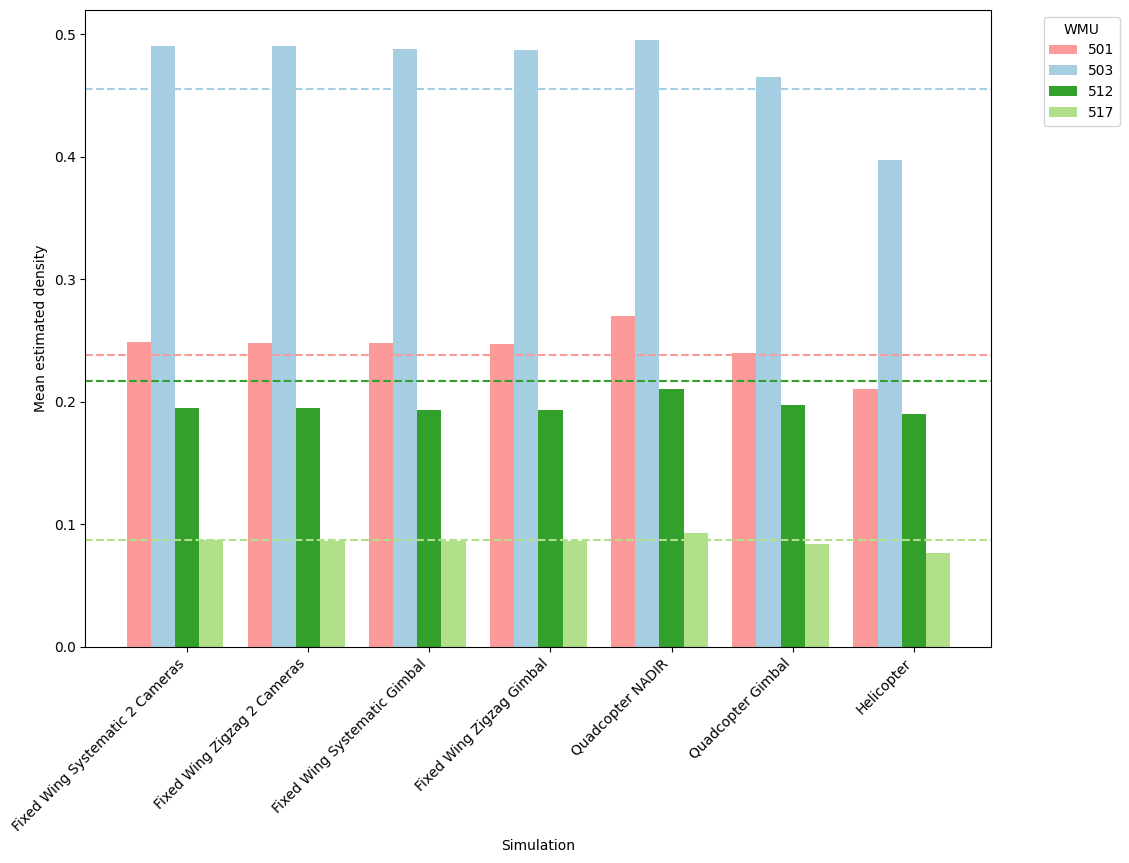

In [31]:
# Predefined colors for each WMU
wmu_colors = {
    'WMU501': '#fb9a99',   # Pink
    'WMU503': '#a6cee3',  # light Blue
    'WMU512': '#33a02c',  # Green
    'WMU517': '#b2df8a',  # light Green
    'WMU528': '#1f78b4'  # Blue
}

# Custom legend labels
wmu_labels = {
    'WMU501': '501',
    'WMU503': '503',
    'WMU512': '512',
    'WMU517': '517',
    'WMU528': '528'
}

# Plotting
fig, ax = plt.subplots(figsize=(11.69, 8.27))  # A4 size in landscape orientation

# Group by WMU and plot each group
bar_width = 0.2
categories = df['Simulation'].unique()
x = range(len(categories))

for i, (key, grp) in enumerate(df.groupby('WMU')):
    color = wmu_colors.get(key, '#000000')  # Default to black if WMU not found
    label = wmu_labels.get(key, key)  # Use custom label if available, otherwise use key
    ax.bar([p + i * bar_width for p in x], grp['Mean estimated Density'], width=bar_width, label=label, color=color, align='center')
    true_density = grp['True Density'].iloc[6]  # Assuming True Density is the same for each group
    ax.axhline(y=true_density, linestyle='--', color=color, label='_nolegend_')

# Adding labels and title
ax.set_xlabel('Simulation')
ax.set_ylabel('Mean estimated density')
ax.set_xticks([p + bar_width * (len(wmu_labels) - 1) / 2 for p in x])
ax.set_xticklabels(categories, rotation=45, ha='right')

# ax.set_title('Bar Plot of Simulation vs Mean estimated Density')
# Place legend outside the plot
ax.legend(title='WMU', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.show()

In [ ]:
# Construct the relative path to the CSV file
file_path = os.path.join('..', '..', 'Output', 'Simulation', 'density_sim_comparison.csv')

# Load the CSV file
df = pd.read_csv(file_path)
# Renaming columns
df.rename(columns={'Unnamed: 0' : 'ID', 'WMU':'WMU', 'Density':'Density','Simulation':'Simulation', 'Mean_estimated_Density':'Mean estimated Density', 'True_Density':'True Density','Mean_relative_Estimate': 'Relative mean estimate', 'Percent_Bias': 'Bias (%)', 'RRMSE': 'Relative RMSE', 'CI_Coverage_Prob': 'Probortion 95% CI', 'Mean_SE': 'Mean se', 'CV': 'Coefficient of variation', 'Mean_ER': 'Mean encounter rate', 'Mean_se_ER': 'Mean standard error ER'}, inplace=True)

# Remove the iteration number and keep only the first 6 characters
# df['WMU'] = df['WMU'].str.slice(0, 6)

# Dictionary to map old simulation names to new ones
simulation_rename_dict = {
    'FW-Sys_G': 'Fixed Wing Systematic Gimbal',
    'QC-Sys': 'Quadcopter Gimbal',
    'H-SG': 'Helicopter'
}
# Renaming the simulations
df['Simulation'] = df['Simulation'].replace(simulation_rename_dict)


In [72]:
# Display the first few rows of the dataframe
print(df)
print(df.columns)

                  ID  WMU  Density Simulation  Mean estimated Density  \
0   WMU503_D0.0.25.1  503     0.25       H-SG                   0.101   
1   WMU503_D0.0.25.2  503     0.25   FW-Sys G                   0.120   
2   WMU503_D0.0.25.3  503     0.25     QC-Sys                   0.121   
3    WMU503_D0.0.5.1  503     0.50       H-SG                   0.201   
4    WMU503_D0.0.5.2  503     0.50   FW-Sys G                   0.237   
5    WMU503_D0.0.5.3  503     0.50     QC-Sys                   0.224   
6   WMU503_D0.0.75.1  503     0.75       H-SG                   0.299   
7   WMU503_D0.0.75.2  503     0.75   FW-Sys G                   0.352   
8   WMU503_D0.0.75.3  503     0.75     QC-Sys                   0.327   
9   WMU517_D0.0.25.1  517     0.25       H-SG                   0.020   
10  WMU517_D0.0.25.2  517     0.25   FW-Sys G                   0.023   
11  WMU517_D0.0.25.3  517     0.25     QC-Sys                   0.023   
12   WMU517_D0.0.5.1  517     0.50       H-SG      

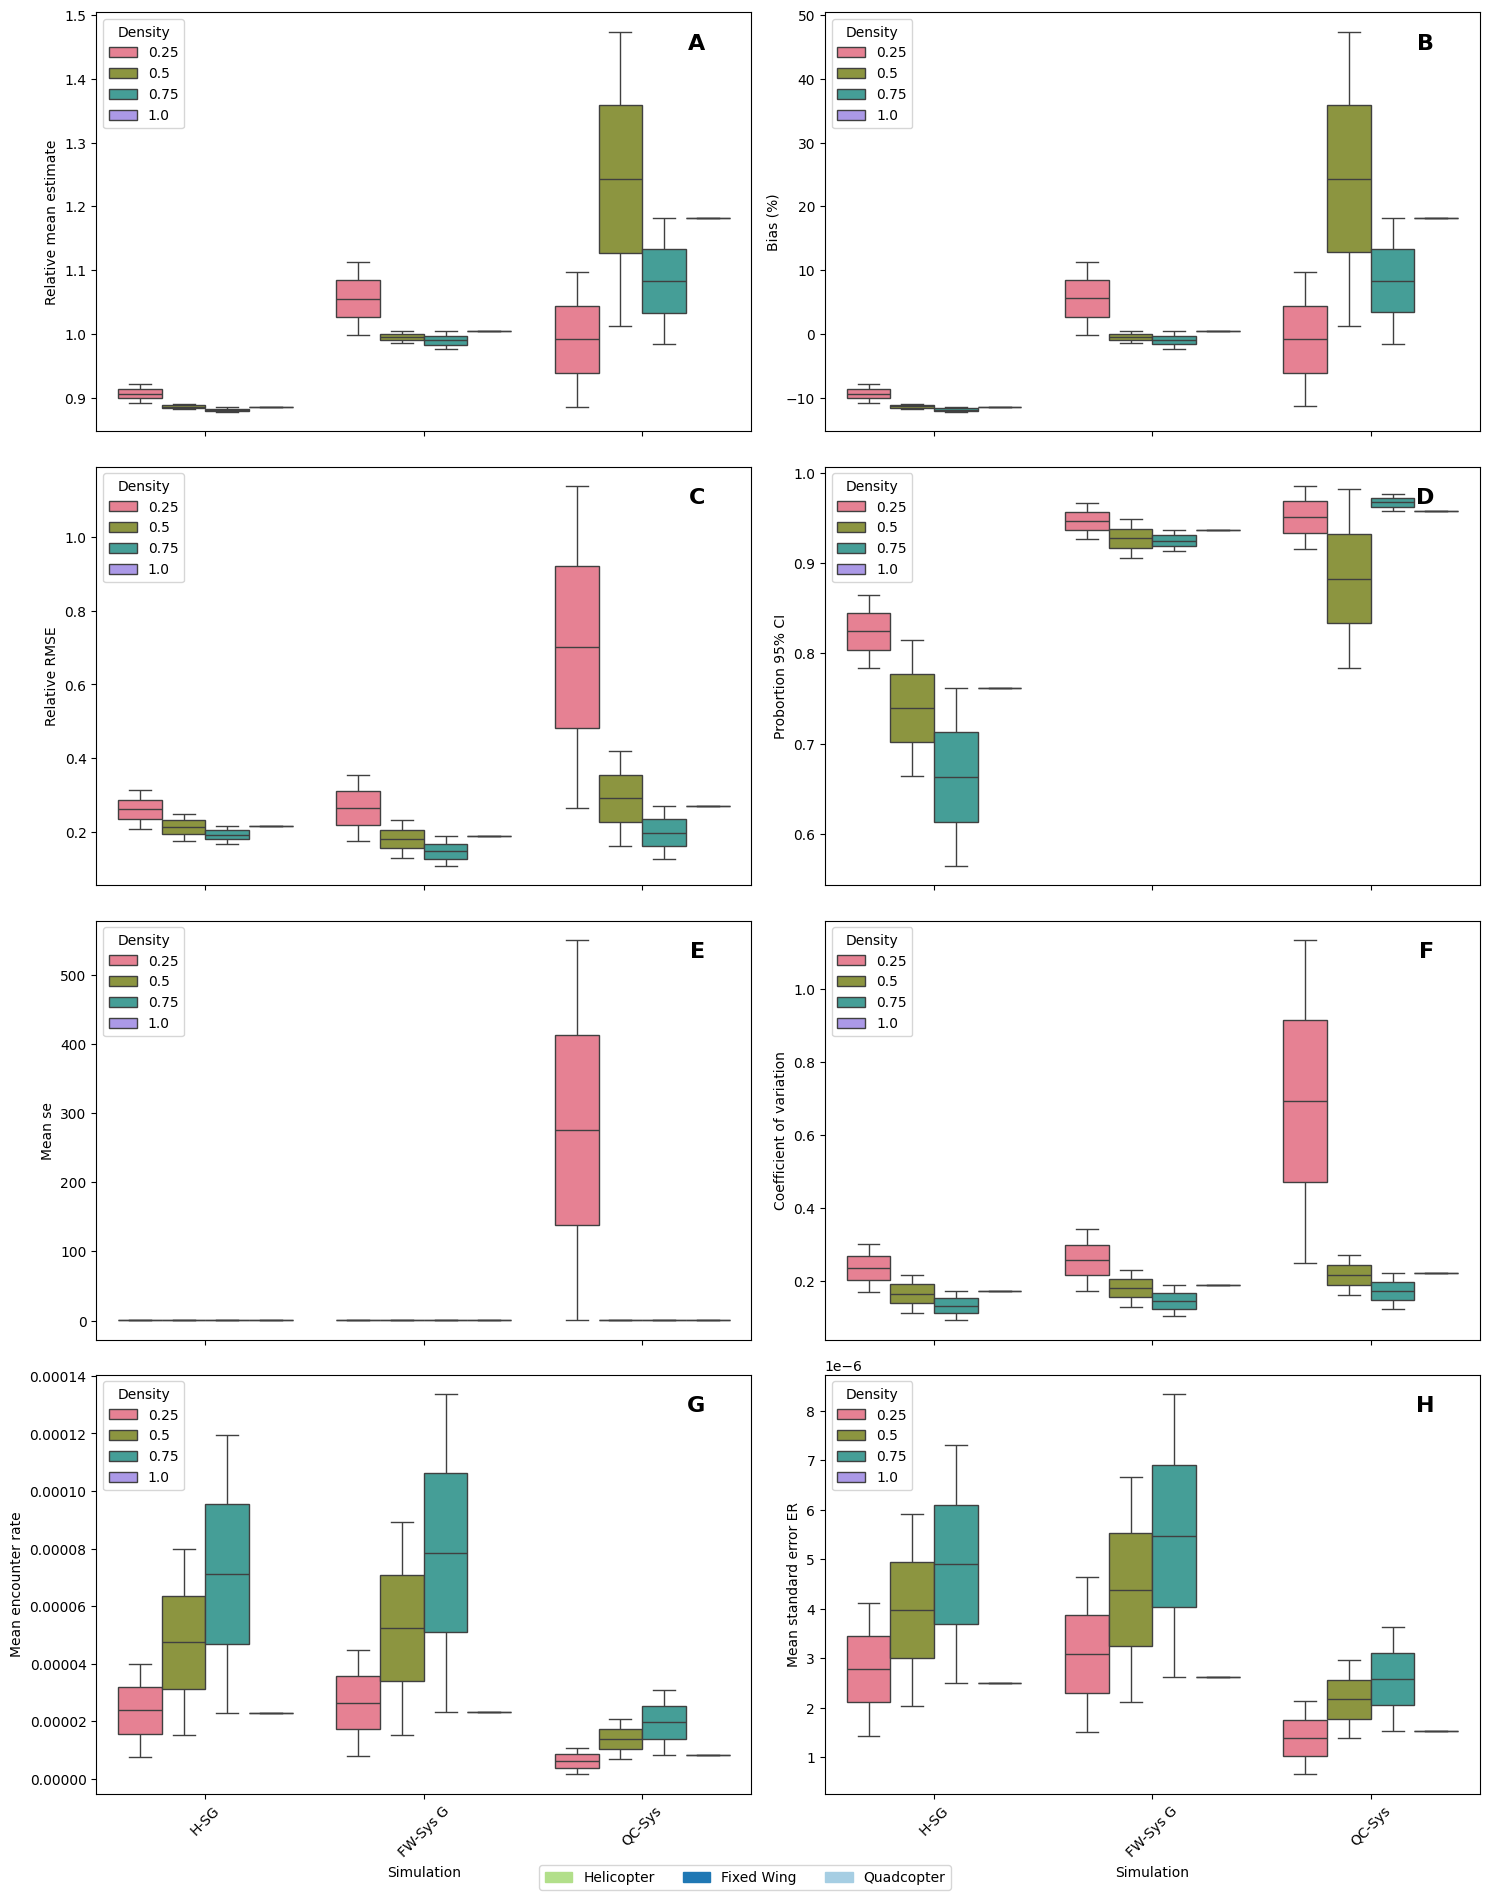

In [73]:


# List of column indices to plot (0-based index)
columns_to_plot = [6, 7, 8, 9, 10, 11, 12,13]  # Example: columns 4-6

# Number of columns to plot
num_columns = len(columns_to_plot)

# Calculate the number of rows and columns for the subplots
ncols = 2
nrows = math.ceil(num_columns / ncols)

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define a function to assign colors based on 'Simulation' values
def get_color(simulation):
    if simulation.startswith('FW'):
        return '#1f78b4'
    elif simulation.startswith('QC'):
        return '#a6cee3'
    else:
        return '#b2df8a'

# Letters to annotate subplots
letters = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

# Create a color palette for the 'Density' column
density_palette = sns.color_palette("husl", len(df['Density'].unique()))
density_palette = {density: color for density, color in zip(df['Density'].unique(), density_palette)}

# Loop through each specified column in the DataFrame
for i, col_index in enumerate(columns_to_plot):
    column = df.columns[col_index]
    
    # Create a color palette based on the 'Simulation' column
    palette = {sim: get_color(sim) for sim in df['Simulation'].unique()}
    
    sns.boxplot(x='Simulation', y=column, hue='Density', data=df, ax=axes[i], palette=density_palette)

    # Add letter annotation in the top right corner
    axes[i].text(0.93, 0.95, letters[i], transform=axes[i].transAxes, 
                 fontsize=16, fontweight='bold', va='top', ha='right')
    
    # Add title and labels
    # axes[i].set_title(f'Boxplot of {column} by Simulation')
    axes[i].set_ylabel(column)
    
    # Rotate x-axis labels
    axes[i].tick_params(axis='x', rotation=45)
    
    # Hide x-axis labels for all but the last row of subplots
    if i < (nrows - 1) * ncols:
        axes[i].set_xlabel('')
        axes[i].set_xticklabels([])

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Create custom legend handles for 'Simulation'
legend_handles = [
    Patch(color='#1f78b4', label='Fixed Wing'),
    Patch(color='#a6cee3', label='Quadcopter'),
    Patch(color='#b2df8a', label='Helicopter')
]

# Add the legend to the figure
fig.legend(handles=legend_handles, loc='lower center', ncol=3)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust rect to make space for the legend

# Show the plot
plt.show()

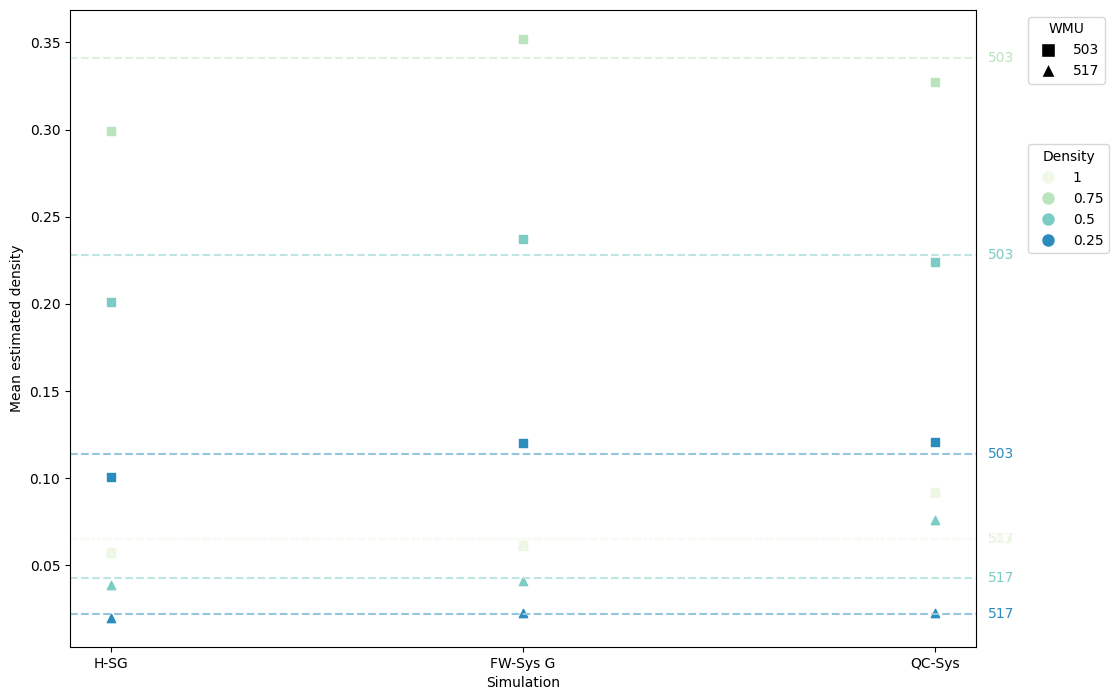

In [78]:
# Function to lighten a color
def lighten_color(color, amount=0.5):
    try:
        c = mcolors.cnames[color]
    except KeyError:
        c = color
    c = np.array(mcolors.to_rgba(c))
    white = np.array(mcolors.to_rgba('white'))
    return mcolors.to_hex((1 - amount) * c[:3] + amount * white[:3])


# Predefined colors for each Density value, 4-class GnBu
density_colors = {
    1: '#f0f9e8', # White ish
    0.75: '#bae4bc',   # Light
    0.5: '#7bccc4',   # Medium
    0.25: '#2b8cbe'  # Dark  
}

# Create lighter colors for each Density value
density_lighter_colors = {density: lighten_color(color, 0.5) for density, color in density_colors.items()}

# Predefined symbols for each WMU
wmu_symbols = {
    '503': 's',  # Square
    '517': '^'   # Triangle up
}

# Custom legend labels
wmu_labels = {
    '503': '503',
    '517': '517'
}

# Plotting
fig, ax = plt.subplots(figsize=(11.69, 8.27))  # A4 size in landscape orientation

# Group by WMU and plot each group
for key, grp in df.groupby('WMU'):
    for density, density_grp in grp.groupby('Density'):
        color = density_colors.get(density, '#000000')  # Default to black if Density not found
        lighter_color = density_lighter_colors.get(density, '#000000')  # Default to black if Density not found
        symbol = wmu_symbols.get(str(key), 'o')  # Default to circle if WMU not found
        label = f"{wmu_labels.get(str(key), key)} - {density}"
        ax.scatter(density_grp['Simulation'], density_grp['Mean estimated Density'], label=label, color=color, marker=symbol)
        true_density = density_grp['True Density'].iloc[0]  # Assuming True Density is the same for each group
        ax.axhline(y=true_density, linestyle='--', color=lighter_color, label='_nolegend_')
        # Add text annotation for WMU at the True Density line
        max_xlim = ax.get_xlim()[1]
        ax.text(max_xlim + 0.03, true_density, f"{wmu_labels.get(str(key), key)}", 
                verticalalignment='center', color=color)

# Adding labels and title
ax.set_xlabel('Simulation')
ax.set_ylabel('Mean estimated density')
# ax.set_title('Scatter Plot of Simulation vs Mean estimated Density')

# Create custom legends

# Legend for WMU symbols
wmu_legend = [Line2D([0], [0], marker=wmu_symbols[key], color='w', label=wmu_labels[key],
                     markerfacecolor='black', markersize=10) for key in wmu_symbols]

# Legend for Density colors
density_legend = [Line2D([0], [0], marker='o', color='w', label=str(density),
                         markerfacecolor=color, markersize=10) for density, color in density_colors.items()]

# Add legends to the plot
legend1 = ax.legend(handles=wmu_legend, title='WMU', bbox_to_anchor=(1.05, 1), loc='upper left')
legend2 = ax.legend(handles=density_legend, title='Density', bbox_to_anchor=(1.05, 0.8), loc='upper left')

# Add the first legend back
ax.add_artist(legend1)

# Adjust plot limits to make space for the labels
# ax.set_xlim(right=ax.get_xlim()[1] + 0.5)

# Show plot
plt.show()

KeyError: 'Density'

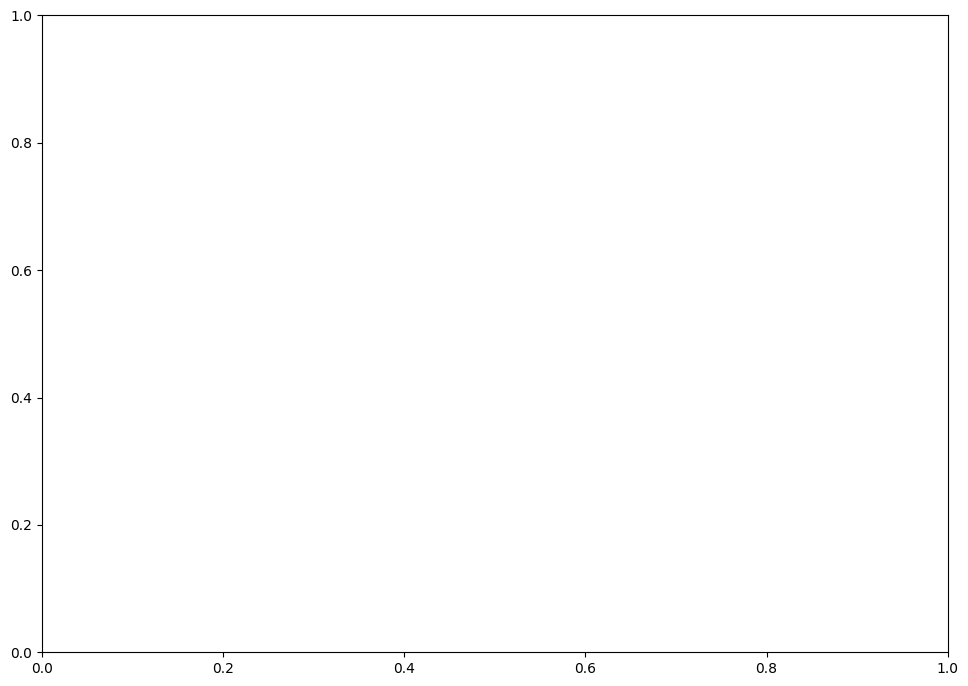

In [6]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from matplotlib.lines import Line2D

# Function to lighten a color
def lighten_color(color, amount=0.5):
    try:
        c = mcolors.cnames[color]
    except KeyError:
        c = color
    c = np.array(mcolors.to_rgba(c))
    white = np.array(mcolors.to_rgba('white'))
    return mcolors.to_hex((1 - amount) * c[:3] + amount * white[:3])

# Predefined colors for each Density value, 4-class GnBu
density_colors = {
    1: '#f0f9e8', # White ish
    0.75: '#bae4bc',   # Light
    0.5: '#7bccc4',   # Medium
    0.25: '#2b8cbe'  # Dark  
}

# Create lighter colors for each Density value
density_lighter_colors = {density: lighten_color(color, 0.5) for density, color in density_colors.items()}

# Predefined symbols for each WMU
wmu_symbols = {
    '503': 's',  # Square
    '517': '^'   # Triangle up
}

# Custom legend labels
wmu_labels = {
    '503': '503',
    '517': '517'
}

# Plotting
fig, ax = plt.subplots(figsize=(11.69, 8.27))  # A4 size in landscape orientation

# Group by WMU and plot each group
for key, grp in df.groupby('WMU'):
    for density, density_grp in grp.groupby('Density'):
        color = density_colors.get(density, '#000000')  # Default to black if Density not found
        lighter_color = density_lighter_colors.get(density, '#000000')  # Default to black if Density not found
        label = f"{wmu_labels.get(str(key), key)} - {density}"
        ax.bar(density_grp['Simulation'], density_grp['Mean estimated Density'], label=label, color=color)
        true_density = density_grp['True Density'].iloc[0]  # Assuming True Density is the same for each group
        ax.axhline(y=true_density, linestyle='--', color=lighter_color, label='_nolegend_')
        # Add text annotation for WMU at the True Density line
        max_xlim = ax.get_xlim()[1]
        ax.text(max_xlim + 0.03, true_density, f"{wmu_labels.get(str(key), key)}", 
                verticalalignment='center', color=color)

# Adding labels and title
ax.set_xlabel('Simulation')
ax.set_ylabel('Mean estimated density')
# ax.set_title('Bar Plot of Simulation vs Mean estimated Density')

# Create custom legends

# Legend for WMU symbols
wmu_legend = [Line2D([0], [0], marker=wmu_symbols[key], color='w', label=wmu_labels[key],
                     markerfacecolor='black', markersize=10) for key in wmu_symbols]

# Legend for Density colors
density_legend = [Line2D([0], [0], marker='o', color='w', label=str(density),
                         markerfacecolor=color, markersize=10) for density, color in density_colors.items()]

# Add legends to the plot
legend1 = ax.legend(handles=wmu_legend, title='WMU', bbox_to_anchor=(1.05, 1), loc='upper left')
legend2 = ax.legend(handles=density_legend, title='Density', bbox_to_anchor=(1.05, 0.8), loc='upper left')

# Add the first legend back
ax.add_artist(legend1)

# Adjust plot limits to make space for the labels
# ax.set_xlim(right=ax.get_xlim()[1] + 0.5)

# Show plot
plt.show()

Processing WMU: 503, Density: 0.25
Processing WMU: 503, Density: 0.5
Processing WMU: 503, Density: 0.75
Processing WMU: 503, Density: 1.0
Processing WMU: 517, Density: 0.25
Processing WMU: 517, Density: 0.5
Processing WMU: 517, Density: 0.75
Processing WMU: 517, Density: 1.0


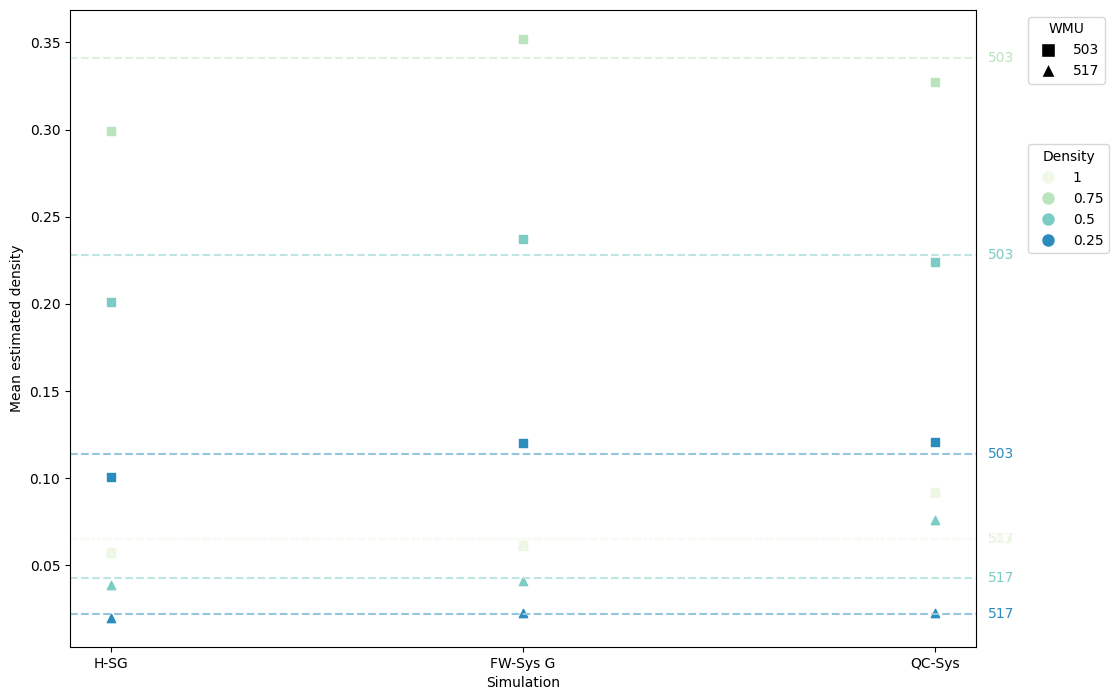

In [79]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D

# Function to lighten a color
def lighten_color(color, amount=0.5):
    try:
        c = mcolors.cnames[color]
    except KeyError:
        c = color
    c = np.array(mcolors.to_rgba(c))
    white = np.array(mcolors.to_rgba('white'))
    return mcolors.to_hex((1 - amount) * c[:3] + amount * white[:3])

# Predefined colors for each Density value, 4-class GnBu
density_colors = {
    1: '#f0f9e8',  # White ish
    0.75: '#bae4bc',  # Light
    0.5: '#7bccc4',  # Medium
    0.25: '#2b8cbe'  # Dark
}

# Create lighter colors for each Density value
density_lighter_colors = {density: lighten_color(color, 0.5) for density, color in density_colors.items()}

# Predefined symbols for each WMU
wmu_symbols = {
    '503': 's',  # Square
    '517': '^'  # Triangle up
}

# Custom legend labels
wmu_labels = {
    '503': '503',
    '517': '517'
}

# Plotting
fig, ax = plt.subplots(figsize=(11.69, 8.27))  # A4 size in landscape orientation

# Group by WMU and plot each group
for key, grp in df.groupby('WMU'):
    for density, density_grp in grp.groupby('Density'):
        print(f"Processing WMU: {key}, Density: {density}")  # Debugging line
        if density not in density_colors:
            print(f"Density {density} not found in density_colors")
            continue
        color = density_colors[density]
        lighter_color = density_lighter_colors[density]
        symbol = wmu_symbols.get(str(key), 'o')  # Default to circle if WMU not found
        label = f"{wmu_labels.get(str(key), key)} - {density}"
        ax.scatter(density_grp['Simulation'], density_grp['Mean estimated Density'], label=label, color=color, marker=symbol)
        true_density = density_grp['True Density'].iloc[0]  # Assuming True Density is the same for each group
        ax.axhline(y=true_density, linestyle='--', color=lighter_color, label='_nolegend_')
        # Add text annotation for WMU at the True Density line
        max_xlim = ax.get_xlim()[1]
        ax.text(max_xlim + 0.03, true_density, f"{wmu_labels.get(str(key), key)}", 
                verticalalignment='center', color=color)

# Adding labels and title
ax.set_xlabel('Simulation')
ax.set_ylabel('Mean estimated density')
# ax.set_title('Scatter Plot of Simulation vs Mean estimated Density')

# Create custom legends

# Legend for WMU symbols
wmu_legend = [Line2D([0], [0], marker=wmu_symbols[key], color='w', label=wmu_labels[key],
                     markerfacecolor='black', markersize=10) for key in wmu_symbols]

# Legend for Density colors
density_legend = [Line2D([0], [0], marker='o', color='w', label=str(density),
                         markerfacecolor=color, markersize=10) for density, color in density_colors.items()]

# Add legends to the plot
legend1 = ax.legend(handles=wmu_legend, title='WMU', bbox_to_anchor=(1.05, 1), loc='upper left')
legend2 = ax.legend(handles=density_legend, title='Density', bbox_to_anchor=(1.05, 0.8), loc='upper left')

# Add the first legend back
ax.add_artist(legend1)

# Adjust plot limits to make space for the labels
# ax.set_xlim(right=ax.get_xlim()[1] + 0.5)

# Show plot
plt.show()